### Data origin
Video annotations were matched with their corresponding audio clips, called annotation audio. Each annotation audio file was scanned for high SNR calls that were free of overlap or reverberation. A single call was taken from each annotation audio and these are called the 'individual call' clips. The idea is to compare the call properties of the calls by emitted by individual bats vs groups of bats. 

The single call audio files were in turn automatically extracted from their longer annotation audio clips. The single call segments were from manually made annotations by Aditya, and the call selection (start and end time) were manually verified once more by TB in the 'Correcting and checking single call annotations' Jupyter notebook. 

The individual call measurements for each call region are from the itsfm runs performed on single calls. The single calls of each night are placed according to the corresponding video hour, and the ```itsfm``` [1] runs are performed based on the batch files for each video hour. Each ```itsfm``` batchfile run leads to a measurement file with one row for one call regions measurements. 

- Author: Thejasvi Beleyur, June 2020

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import numpy as np 
np.random.seed(82319)
import os
import natsort
import pandas as pd
import format_and_clean
from format_and_clean import ind_call_format as icf

import sys

import itsfm

In [2]:
sys.path.append('../../correct_call_annotations/')
import correct_bad_segs.re_measure_bad_segs as rmbg


In [3]:
print(f"Notebook run started at : {dt.datetime.now()}")

Notebook run started at : 2020-12-17 13:49:32.633357


In [4]:
dB = lambda X : 20*np.log10(np.abs(X))

In [5]:
%matplotlib notebook

In [6]:
manual_checked_dirs = icf.get_folders_with_manual_checks('./')
natsort.natsorted(manual_checked_dirs)

['./2018-08-16_2150-2300',
 './2018-08-16_2300-2400',
 './2018-08-17_0000-0100',
 './2018-08-17_0100-0200',
 './2018-08-17_0200-0300',
 './2018-08-17_0300-0400',
 './2018-08-17_0400-0500',
 './2018-08-17_0500-0600',
 './2018-08-19_0120-0300',
 './2018-08-19_0200-0300',
 './2018-08-20_0200-0300',
 './2018-08-20_0300-0400']

In [7]:
# load the measurement files and remove those annotations that are in the 'donot_analyse' file
all_msmts = []
for each in manual_checked_dirs:
    msmt_file = glob.glob(os.path.join(each, 'measurement*.csv'))[0]
    measurements = pd.read_csv(msmt_file)
    if 'donot_analyse.txt' in os.listdir(each):
        measurements = icf.remove_badquality_points(each, measurements)
    all_msmts.append(measurements)

In [8]:
measurements

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold
0,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.000316,0.005859,6250.000000,69620.253165,fm1,0.002876,0.001332,0.001648,101265.822785,-10
1,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.028276,0.093628,70.721358,106026.312067,cf1,0.042218,0.001648,0.029924,105884.849342,-10
2,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002076,0.055756,961.538462,103564.547206,fm2,0.024289,0.029924,0.032000,89595.375723,-10
3,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001424,0.032684,1396.648045,103932.584270,fm1,0.014969,0.000920,0.002344,94101.123596,-10
4,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.014780,0.072662,135.281385,106630.581867,cf1,0.039062,0.002344,0.017124,106224.627876,-10
5,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001608,0.041199,1237.623762,105721.393035,fm2,0.020991,0.017124,0.018732,92039.800995,-10
6,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001860,0.011444,1072.961373,93010.752688,fm1,0.005515,0.000452,0.002312,91397.849462,-10
7,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.027412,0.036011,72.950102,104990.515103,cf1,0.017976,0.002312,0.029724,104881.073982,-10
8,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001608,0.016266,1237.623762,95149.253731,fm2,0.007205,0.029724,0.031332,89552.238806,-10
9,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002260,0.010040,883.392226,95575.221239,fm1,0.004308,0.001240,0.003500,89823.008850,-10


In [9]:
all_msmts_df = pd.concat(all_msmts).reset_index(drop=True)

In [10]:
all_msmts_df

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold
0,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.020396,0.103302,98.039216,105608.942930,cf1,0.047767,0.001612,0.022008,105559.913709,-10
1,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.002288,0.048706,871.080139,105332.167832,fm1,0.017969,0.022008,0.024296,87412.587413,-10
2,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.001896,0.144958,1050.420168,98101.265823,fm1,0.062056,0.000852,0.002748,90189.873418,-10
3,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.035340,0.275482,56.586691,106225.240521,cf1,0.111541,0.002748,0.038088,106112.054329,-10
4,2,segment_matching_annotaudio_Aditya_2018-08-16_...,0.000688,0.042053,2873.563218,104651.162791,fm2,0.022076,0.038088,0.038776,101744.186047,-10
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001888,0.112671,1054.852321,104343.220339,fm2,0.054230,0.013840,0.015728,87394.067797,-10
1137,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.017296,0.041077,115.580213,105168.825162,cf1,0.023302,0.001572,0.018868,105111.008326,-10
1138,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002176,0.044647,915.750916,99264.705882,fm1,0.020848,0.018868,0.021044,87775.735294,-10
1139,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.017308,0.030853,115.526802,106366.997920,cf1,0.015357,0.001256,0.018564,106135.890917,-10


In [11]:
all_msmts_df['video_annot_id'] = all_msmts_df['audio_file'].apply(icf.remove_segment_matching_annotaudio_)
# remove the '_hp' from the video_annot_ida

all_msmts_df['video_annot_id'] = all_msmts_df['video_annot_id'].str.rstrip('_hp')

In [12]:
video_annot_folder = '../../whole_data_analysis/annotations/corrected_HBC_video_annotations_Aditya/'
all_msmts_df['num_bats'] = icf.get_numbats_from_annotation_id(all_msmts_df['video_annot_id'], video_annot_folder)

<IPython.core.display.Javascript object>


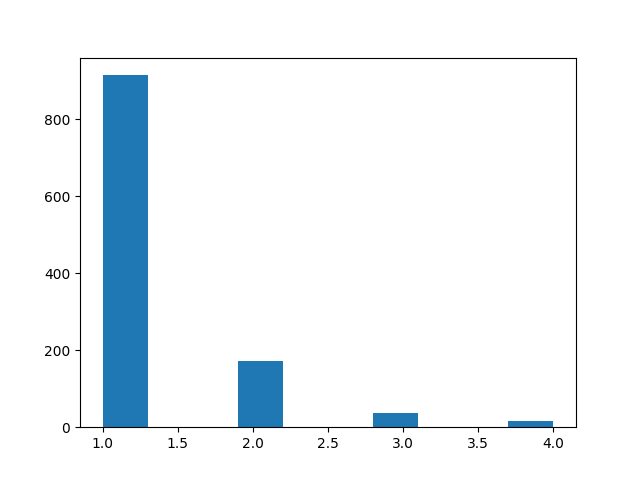

(array([914.,   0.,   0., 173.,   0.,   0.,  38.,   0.,   0.,  16.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

In [13]:
plt.figure()
plt.hist(all_msmts_df['num_bats'])

In [14]:
np.unique(all_msmts_df['num_bats'], return_counts=True)

(array([1, 2, 3, 4], dtype=int64), array([914, 173,  38,  16], dtype=int64))

### Checking if all nights have single AND multi bat records:
This I need to do to make sure that we've squeezed out the max from the data!

In [15]:
numbats_per_day = pd.DataFrame(data=all_msmts_df['num_bats'],columns=['num_bats'])
numbats_per_day['date'] = all_msmts_df['video_annot_id'].apply(lambda X: X[7:17], 1)
grouped_bat_contexts_perday = numbats_per_day.groupby('date')

In [16]:
# print the summary stats of how many single, double and triple bat flight annotations are in the dataset.

for date, subdf in grouped_bat_contexts_perday:
    nums, counts = np.unique(subdf['num_bats'], return_counts=True)
    print(date, nums, counts)

2018-08-16 [1 2 3] [237  64   6]
2018-08-17 [1 2 3 4] [507 100  21  16]
2018-08-19 [1 2 3] [132   9  11]
2018-08-20 [1] [38]


### Confirmation: The single and multi bat annotations have been merged after the Tuebingen conference!

In [17]:
unique_ids  = all_msmts_df.groupby(['video_annot_id'])

In [18]:
annot = list(unique_ids.groups.keys())[10]
unique_ids.get_group(annot)

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
6,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.000816,0.012207,2427.184466,106617.647059,fm1,0.006330,0.000100,0.000916,99264.705882,-10,Aditya_2018-08-16_21502300_20,1
7,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.017800,0.031921,112.309075,108651.685393,cf1,0.014608,0.000916,0.018716,108539.325843,-10,Aditya_2018-08-16_21502300_20,1
8,2,segment_matching_annotaudio_Aditya_2018-08-16_...,0.001496,0.043518,1329.787234,97593.582888,fm2,0.017439,0.018716,0.020212,89572.192513,-10,Aditya_2018-08-16_21502300_20,1


In [19]:
poorly_seg_calls = ['Aditya_2018-08-16_21502300_100', 'Aditya_2018-08-16_21502300_102', 'Aditya_2018-08-16_21502300_19',
          'Aditya_2018-08-16_2324_14', 'Aditya_2018-08-16_2324_148', 'Aditya_2018-08-16_2324_154', 'Aditya_2018-08-16_2324_197',
          'Aditya_2018-08-16_2324_207', 'Aditya_2018-08-16_2324_223', 'Aditya_2018-08-16_2324_230', 'Aditya_2018-08-16_2324_258',
          'Aditya_2018-08-16_2324_28','Aditya_2018-08-16_2324_68', 'Aditya_2018-08-16_2324_90', 'Aditya_2018-08-16_2324_94',
          'Aditya_2018-08-17_01_15', 'Aditya_2018-08-17_01_28', 'Aditya_2018-08-17_01_29', 'Aditya_2018-08-17_01_35',
          'Aditya_2018-08-17_01_40', 'Aditya_2018-08-17_01_46', 'Aditya_2018-08-17_01_60', 'Aditya_2018-08-17_01_80',
          'Aditya_2018-08-17_01_81', 'Aditya_2018-08-17_12_100', 'Aditya_2018-08-17_12_108', 'Aditya_2018-08-17_12_110',
          'Aditya_2018-08-17_12_117','Aditya_2018-08-17_12_121', 'Aditya_2018-08-17_12_76',
          'Aditya_2018-08-17_34_40', 'Aditya_2018-08-17_34_65','Aditya_2018-08-17_34_71', 'Aditya_2018-08-17_34_72',
          'Aditya_2018-08-17_45_116','Aditya_2018-08-17_45_126', 'Aditya_2018-08-17_45_127',
          'Aditya_2018-08-17_45_173','Aditya_2018-08-17_45_200', 'Aditya_2018-08-17_45_203', 'Aditya_2018-08-17_45_269',
          'Aditya_2018-08-17_45_29', 'Aditya_2018-08-17_45_337', 'Aditya_2018-08-17_45_342', 'Aditya_2018-08-19_0120-0200_110',
          'Aditya_2018-08-19_0120-0200_112', 'Aditya_2018-08-19_0120-0200_59',
          'Aditya_2018-08-19_0120-0200_90', 'Aditya_2018-08-19_23_16', 'Aditya_2018-08-19_23_17',
          'Aditya_2018-08-19_23_18', 'Aditya_2018-08-19_23_39', 'Aditya_2018-08-20_0300-0400_56',
          'Aditya_2018-08-17_23_111','Aditya_2018-08-17_23_133','Aditya_2018-08-17_23_14',
          'Aditya_2018-08-17_23_145','Aditya_2018-08-17_23_15', 'Aditya_2018-08-17_23_173',
          'Aditya_2018-08-17_23_196','Aditya_2018-08-17_23_56', 'Aditya_2018-08-17_23_70',
          'Aditya_2018-08-17_23_84',
          ]

df = all_msmts_df.copy()
for each in poorly_seg_calls:
    df = df[df['video_annot_id'] != each]

icf.make_one_row_per_call(df)

F:\horseshoebat_data\individual_call_analysis\analysis\format_and_clean\ind_call_format.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_wide_formatted[each] = time_sorted[each][0]


,ifm_peak_frequency,ifm_stop,ifm_peak_freq_resolution,ifm_rms,ifm_region_id,ifm_peak_amplitude,ifm_start,ifm_terminal_frequency,ifm_duration,cf_peak_frequency,...,tfm_start,tfm_terminal_frequency,tfm_duration,audio_file,terminal_frequency_threshold,video_annot_id,num_bats,0,duration,peak_freq_resolution
0,107476.635514,0.002048,4629.629630,0.009964,fm1,0.019897,0.001620,102803.738318,0.000428,108090.185676,...,0.020144,89018.302829,0.002404,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_101,1,NaN,NaN,NaN
1,103211.009174,0.002412,1141.552511,0.149708,fm1,0.263123,0.000668,95756.880734,0.001744,107096.354167,...,0.017772,92059.336824,0.002292,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_104,1,NaN,NaN,NaN
2,104885.057471,0.002440,1428.571429,0.016833,fm1,0.043701,0.001048,99856.321839,0.001392,107413.116592,...,0.016712,96547.314578,0.001564,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_106,1,NaN,NaN,NaN
3,106060.606061,0.001236,1677.852349,0.011683,fm1,0.022827,0.000048,99326.599327,0.001188,106848.912404,...,0.014844,97150.259067,0.002316,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_108,2,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105551.824491,...,0.018824,92136.150235,0.001704,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_110,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,102941.176471,0.000448,5813.953488,0.004141,fm1,0.008911,0.000108,85294.117647,0.000340,102452.996475,...,0.014064,85007.173601,0.002788,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_61,1,NaN,NaN,NaN
298,89826.839827,0.002216,1077.586207,0.017552,fm1,0.036652,0.000368,86580.086580,0.001848,101949.112979,...,0.019352,83535.108959,0.001652,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_85,1,NaN,NaN,NaN
299,95953.002611,0.001984,1302.083333,0.016604,fm1,0.027985,0.000452,93342.036554,0.001532,105937.921727,...,0.013840,87394.067797,0.001888,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_90,1,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105168.825162,...,0.018868,87775.735294,0.002176,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_91,1,NaN,NaN,NaN


### Temporarily poorly segmented calls:
The 'odd' calls are all those that don't satisfy the typical conditions for a horseshoebat call, ie. max 3 call segments, max 1 CF and max 2 FM segments. The reason the 'odd' calls don't satisfy the conditions is just because some calls have a 'hooked' FM segment. These hooks are segmented sometimes as an FM + CF segment, or even FM+CF+FM segments, which makes those calls seem odd. These calls will be manually verified once more and then added back into the main dataset.

In [20]:
len(poorly_seg_calls)

63

In [21]:
# save the problem calls into a csv file for further processing in the'Handling badly segmented horseshoe bat calls'
# ntoebook
problem_calls_df = pd.DataFrame(data=poorly_seg_calls, columns=['odd_calls'])
problem_calls_df.to_csv('poorly_segmented_calls.csv')

odd_df = all_msmts_df.copy()
odd_call = []
for each in poorly_seg_calls:
    match = odd_df[odd_df['video_annot_id'] == each]
    if match.shape[0] == 0:
        raise ValueError(f'Something is wrong, couldnt find annotation: {each}')
    odd_call.append(match)

odd_calls_w_regions = pd.concat(odd_call).reset_index(drop=True)
odd_calls_w_regions.to_csv('odd_calls_msmts.csv')



In [22]:
all_msmts_df[all_msmts_df['video_annot_id'] == each]

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
561,0,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001388,0.015137,1436.781609,100144.092219,fm1,0.005383,0.000336,0.001724,92219.020173,-10,Aditya_2018-08-17_23_84,1
562,1,segment_matching_annotaudio_Aditya_2018-08-17_...,0.013916,0.027802,143.678161,102256.395516,cf1,0.013947,0.001724,0.015640,102040.816327,-10,Aditya_2018-08-17_23_84,1
563,2,segment_matching_annotaudio_Aditya_2018-08-17_...,0.000192,0.022827,10000.000000,98958.333333,fm2,0.012798,0.015640,0.015832,93750.000000,-10,Aditya_2018-08-17_23_84,1
564,3,segment_matching_annotaudio_Aditya_2018-08-17_...,0.002552,0.024292,781.250000,102272.727273,cf2,0.010570,0.015832,0.018384,101489.028213,-10,Aditya_2018-08-17_23_84,1
565,4,segment_matching_annotaudio_Aditya_2018-08-17_...,0.001860,0.019073,1072.961373,103225.806452,fm3,0.006832,0.018384,0.020244,91935.483871,-10,Aditya_2018-08-17_23_84,1


In [23]:
print(len(np.unique(odd_calls_w_regions['video_annot_id'])))


63


### Let's now remove these poorly segmented calls from the dataset first. 

In [24]:
wo_poorly_segmented_calls = all_msmts_df.copy()
for each in wo_poorly_segmented_calls:
    wo_poorly_segmented_calls = df[df['video_annot_id'] != each]

In [25]:
wo_poorly_segmented_calls

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
0,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.020396,0.103302,98.039216,105608.942930,cf1,0.047767,0.001612,0.022008,105559.913709,-10,Aditya_2018-08-16_21502300_18,1
1,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.002288,0.048706,871.080139,105332.167832,fm1,0.017969,0.022008,0.024296,87412.587413,-10,Aditya_2018-08-16_21502300_18,1
6,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.000816,0.012207,2427.184466,106617.647059,fm1,0.006330,0.000100,0.000916,99264.705882,-10,Aditya_2018-08-16_21502300_20,1
7,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.017800,0.031921,112.309075,108651.685393,cf1,0.014608,0.000916,0.018716,108539.325843,-10,Aditya_2018-08-16_21502300_20,1
8,2,segment_matching_annotaudio_Aditya_2018-08-16_...,0.001496,0.043518,1329.787234,97593.582888,fm2,0.017439,0.018716,0.020212,89572.192513,-10,Aditya_2018-08-16_21502300_20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2,segment_matching_annotaudio_Aditya_2018-08-20_...,0.001888,0.112671,1054.852321,104343.220339,fm2,0.054230,0.013840,0.015728,87394.067797,-10,Aditya_2018-08-20_0300-0400_90,1
1137,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.017296,0.041077,115.580213,105168.825162,cf1,0.023302,0.001572,0.018868,105111.008326,-10,Aditya_2018-08-20_0300-0400_91,1
1138,1,segment_matching_annotaudio_Aditya_2018-08-20_...,0.002176,0.044647,915.750916,99264.705882,fm1,0.020848,0.018868,0.021044,87775.735294,-10,Aditya_2018-08-20_0300-0400_91,1
1139,0,segment_matching_annotaudio_Aditya_2018-08-20_...,0.017308,0.030853,115.526802,106366.997920,cf1,0.015357,0.001256,0.018564,106135.890917,-10,Aditya_2018-08-20_0300-0400_92,1


### Adding back some of the previously poorly segmented calls, after manual checks and verification:


The poorly segmented calls have been re-inspected and  assigned region ids (*See 'Handling badly segmented horseshoe bat calls' notebook for details*).  Let's now add them back into the main dataset. From the 46 poorly segmented calls, only 30 calls could be kept. The remaining 16 calls were discarded because of poor quality call segmentation and audio. 

In [26]:
handled_df = pd.read_csv('correctly_handled_call_measurements.csv')

In [27]:
by_id = handled_df.groupby(['video_annot_id'])
by_id.get_group('Aditya_2018-08-17_23_14')

,Unnamed: 0,start,stop,duration,peak_amplitude,peak_frequency,peak_freq_resolution,rms,terminal_frequency,terminal_frequency_threshold,region_id,audio_file,num_bats,video_annot_id
132,0,0.000040,0.016372,0.016332,0.035980,103783.982366,122.428991,0.017021,103722.752878,-10,cf1,segment_matching_annotaudio_Aditya_2018-08-17_...,1,Aditya_2018-08-17_23_14
133,1,0.016372,0.020836,0.004464,0.032349,103942.652330,447.227191,0.011306,103270.609319,-10,fm1,segment_matching_annotaudio_Aditya_2018-08-17_...,1,Aditya_2018-08-17_23_14


In [28]:
df = pd.concat((df, handled_df)).reset_index(drop=True)

    
call_pt = df.copy().reset_index(drop=True)

onerow_per_call = icf.make_one_row_per_call(call_pt)

F:\horseshoebat_data\individual_call_analysis\analysis\format_and_clean\ind_call_format.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_wide_formatted[each] = time_sorted[each][0]


In [29]:
onerow_per_call.shape

(357, 34)

In [30]:
df.head()

,Unnamed: 0,audio_file,duration,peak_amplitude,peak_freq_resolution,peak_frequency,region_id,rms,start,stop,terminal_frequency,terminal_frequency_threshold,video_annot_id,num_bats
0,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.020396,0.103302,98.039216,105608.942930,cf1,0.047767,0.001612,0.022008,105559.913709,-10,Aditya_2018-08-16_21502300_18,1
1,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.002288,0.048706,871.080139,105332.167832,fm1,0.017969,0.022008,0.024296,87412.587413,-10,Aditya_2018-08-16_21502300_18,1
2,0,segment_matching_annotaudio_Aditya_2018-08-16_...,0.000816,0.012207,2427.184466,106617.647059,fm1,0.006330,0.000100,0.000916,99264.705882,-10,Aditya_2018-08-16_21502300_20,1
3,1,segment_matching_annotaudio_Aditya_2018-08-16_...,0.017800,0.031921,112.309075,108651.685393,cf1,0.014608,0.000916,0.018716,108539.325843,-10,Aditya_2018-08-16_21502300_20,1
4,2,segment_matching_annotaudio_Aditya_2018-08-16_...,0.001496,0.043518,1329.787234,97593.582888,fm2,0.017439,0.018716,0.020212,89572.192513,-10,Aditya_2018-08-16_21502300_20,1


In [31]:
def make_parts_boxplot(df, parameter_name, unit=''):
    part_names = ['ifm_','cf_','tfm_']
    plot_data = []
    sample_sizes = []
    for each in part_names:
        data_column = df[each+parameter_name]
        nonan_data = data_column[~np.isnan(data_column)]
        plot_data.append(nonan_data)
        sample_sizes.append(str(len(nonan_data)))
    
    partnames_w_samplesize = [each[0]+'\n N='+each[1] for each in zip(part_names, sample_sizes)]
    
    plt.figure()
    plt.boxplot(plot_data)
    plt.xticks(range(1,4),partnames_w_samplesize)
    plt.ylabel(parameter_name+f', ({unit})')


<IPython.core.display.Javascript object>


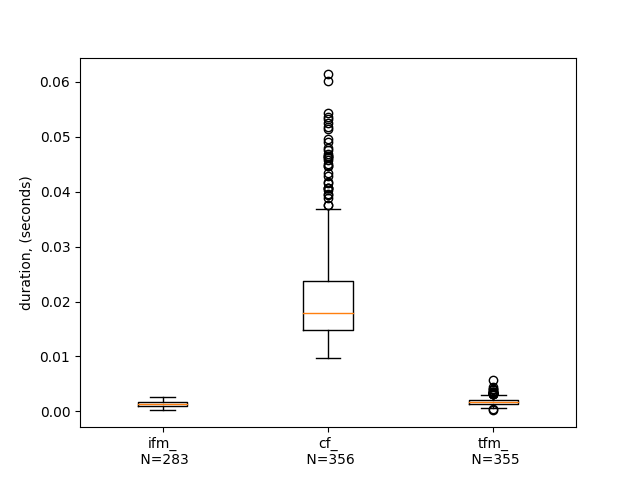

In [32]:
make_parts_boxplot(onerow_per_call, 'duration','seconds')

<IPython.core.display.Javascript object>


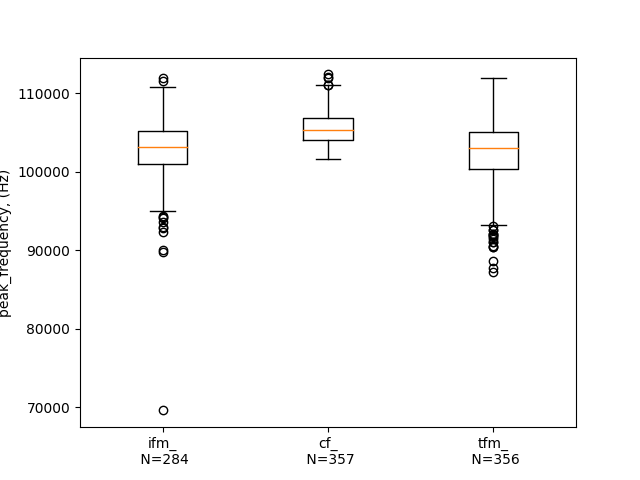

In [33]:
make_parts_boxplot(onerow_per_call, 'peak_frequency','Hz')

<IPython.core.display.Javascript object>


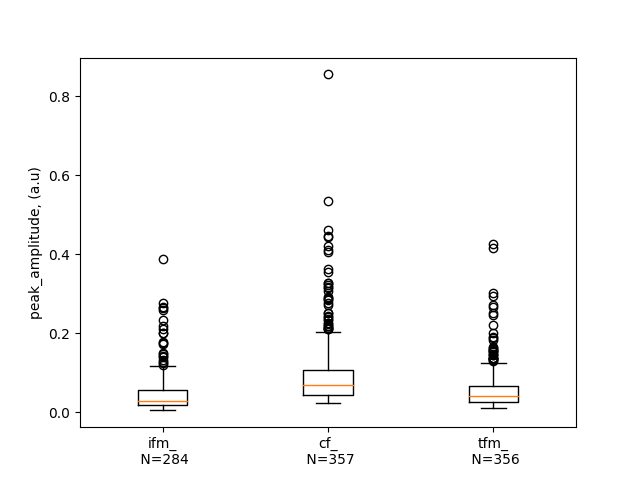

In [34]:
make_parts_boxplot(onerow_per_call, 'peak_amplitude','a.u')

<IPython.core.display.Javascript object>


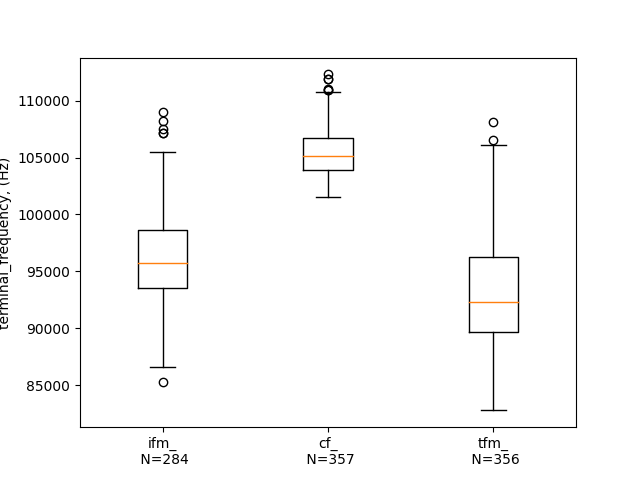

In [35]:
make_parts_boxplot(onerow_per_call, 'terminal_frequency','Hz')

## Verifying the call measurements graphically once more. 
Some call parameters can be easily measured, but need to be verified once more to be sure that they are reliable. For instance, terminal frequency is easily measured, but is sensitive to the presence of reverberation and the first harmonic. In some calls, the -10dB terminal  frequency is actually being picked up at the first harmonic, or where the reverberation of other FM bat calls are. These particular measures need to be eliminated from the measurements. 

In [36]:
onerow_per_call

,ifm_peak_frequency,ifm_stop,ifm_peak_freq_resolution,ifm_rms,ifm_region_id,ifm_peak_amplitude,ifm_start,ifm_terminal_frequency,ifm_duration,cf_peak_frequency,...,tfm_start,tfm_terminal_frequency,tfm_duration,audio_file,terminal_frequency_threshold,video_annot_id,num_bats,0,duration,peak_freq_resolution
0,103470.437018,0.001556,1282.051282,0.125976,fm1,0.259338,0.000000,93830.334190,0.001556,105876.335531,...,0.019152,92566.619916,0.002852,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_100,2,NaN,NaN,NaN
1,107476.635514,0.002048,4629.629630,0.009964,fm1,0.019897,0.001620,102803.738318,0.000428,108090.185676,...,0.020144,89018.302829,0.002404,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_101,1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105379.994777,...,0.016604,88765.603329,0.002884,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_102,1,NaN,NaN,NaN
3,103211.009174,0.002412,1141.552511,0.149708,fm1,0.263123,0.000668,95756.880734,0.001744,107096.354167,...,0.017772,92059.336824,0.002292,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_104,1,NaN,NaN,NaN
4,104885.057471,0.002440,1428.571429,0.016833,fm1,0.043701,0.001048,99856.321839,0.001392,107413.116592,...,0.016712,96547.314578,0.001564,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_106,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,102941.176471,0.000448,5813.953488,0.004141,fm1,0.008911,0.000108,85294.117647,0.000340,102452.996475,...,0.014064,85007.173601,0.002788,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_61,1,NaN,NaN,NaN
353,89826.839827,0.002216,1077.586207,0.017552,fm1,0.036652,0.000368,86580.086580,0.001848,101949.112979,...,0.019352,83535.108959,0.001652,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_85,1,NaN,NaN,NaN
354,95953.002611,0.001984,1302.083333,0.016604,fm1,0.027985,0.000452,93342.036554,0.001532,105937.921727,...,0.013840,87394.067797,0.001888,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_90,1,NaN,NaN,NaN
355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105168.825162,...,0.018868,87775.735294,0.002176,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_91,1,NaN,NaN,NaN


In [37]:
def plot_call_parameters(one_call_msmts, audio_folder='../hp_ind_calls/'):
    '''
    Assumes each call measurement to have ifm, cf and tfm regions, along with their start, stop and other emasurements 

    '''
    df = one_call_msmts.to_frame().T.reset_index(drop=True)
   
    audio, fs = rmbg.load_audio_from_call_region(df, audio_folder)
    plt.figure()
    ax = plt.subplot(111)
    itsfm.make_specgram(audio,fs)
    
    for region in  ['ifm_','tfm_', 'cf_']:
        plot_region_measurements(df, region, fs)
    plt.title(one_call_msmts['video_annot_id'])
    
def plot_region_measurements(df, region, fs):
    '''
    Parameters
    ----------
    df : pd.DataFrame
        one row per call measurements 
    region : str, one of ['ifm_','tfm_', 'cf_']
        The entry should be one of the above only. 
    
    '''
    # start and stop of region 
    start, stop = df[region+'start'], df[region+'stop']
    plt.vlines([start,stop], 0, fs*0.5)
    # plot peak frequency:
    peak_f = df[region+'peak_frequency']
    plt.hlines(peak_f, start, stop, 'r')
    # terminal frequency 
    terminal_f = df[region+'terminal_frequency']
    plt.hlines(terminal_f, start, stop, 'g', linestyles='dashed')
    
    
    
    

In [38]:
onerow_per_call.shape

(357, 34)

### Last round of call removals
Remove a few more calls for the last time before starting the stastical analysis. 

In [39]:
delete_list = ['Aditya_2018-08-17_12_100',
               'Aditya_2018-08-17_45_114',
              'Aditya_2018-08-17_45_117']

final_onerow_per_call = onerow_per_call.copy()
for each in delete_list:
    final_onerow_per_call = final_onerow_per_call[final_onerow_per_call['video_annot_id'] != each]

Now, let's also remove all calls that are not in the 'verified annotations' list. 

In [40]:
verified_annots = pd.read_csv('../../annotation_audio_analysis/verified_annotations.csv')

In [41]:
np.sum(verified_annots['video_annot_id'].isin(['Aditya_2018-08-16_21502300_100']))

1

In [42]:
rows_from_verified_audio = final_onerow_per_call['video_annot_id'].isin(verified_annots['video_annot_id'])
calls_from_verified_audio = final_onerow_per_call[rows_from_verified_audio].reset_index(drop=True)

In [43]:
calls_from_verified_audio

,ifm_peak_frequency,ifm_stop,ifm_peak_freq_resolution,ifm_rms,ifm_region_id,ifm_peak_amplitude,ifm_start,ifm_terminal_frequency,ifm_duration,cf_peak_frequency,...,tfm_start,tfm_terminal_frequency,tfm_duration,audio_file,terminal_frequency_threshold,video_annot_id,num_bats,0,duration,peak_freq_resolution
0,103470.437018,0.001556,1282.051282,0.125976,fm1,0.259338,0.000000,93830.334190,0.001556,105876.335531,...,0.019152,92566.619916,0.002852,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_100,2,NaN,NaN,NaN
1,107476.635514,0.002048,4629.629630,0.009964,fm1,0.019897,0.001620,102803.738318,0.000428,108090.185676,...,0.020144,89018.302829,0.002404,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_101,1,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105379.994777,...,0.016604,88765.603329,0.002884,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_102,1,NaN,NaN,NaN
3,103211.009174,0.002412,1141.552511,0.149708,fm1,0.263123,0.000668,95756.880734,0.001744,107096.354167,...,0.017772,92059.336824,0.002292,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_104,1,NaN,NaN,NaN
4,106060.606061,0.001236,1677.852349,0.011683,fm1,0.022827,0.000048,99326.599327,0.001188,106848.912404,...,0.014844,97150.259067,0.002316,segment_matching_annotaudio_Aditya_2018-08-16_...,-10,Aditya_2018-08-16_21502300_108,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,102941.176471,0.000448,5813.953488,0.004141,fm1,0.008911,0.000108,85294.117647,0.000340,102452.996475,...,0.014064,85007.173601,0.002788,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_61,1,NaN,NaN,NaN
228,89826.839827,0.002216,1077.586207,0.017552,fm1,0.036652,0.000368,86580.086580,0.001848,101949.112979,...,0.019352,83535.108959,0.001652,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_85,1,NaN,NaN,NaN
229,95953.002611,0.001984,1302.083333,0.016604,fm1,0.027985,0.000452,93342.036554,0.001532,105937.921727,...,0.013840,87394.067797,0.001888,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_90,1,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105168.825162,...,0.018868,87775.735294,0.002176,segment_matching_annotaudio_Aditya_2018-08-20_...,-10,Aditya_2018-08-20_0300-0400_91,1,NaN,NaN,NaN


In [44]:
final_onerow_per_call.to_csv('calls_from_verified_audio.csv')

In [45]:
bynumbats = calls_from_verified_audio.groupby(['num_bats'])
for gpsize, df in bynumbats:
    print(f'For groupsize {gpsize}, there are {df.shape[0]} calls found')

For groupsize 1, there are 180 calls found
For groupsize 2, there are 43 calls found
For groupsize 3, there are 7 calls found
For groupsize 4, there are 2 calls found


In [46]:
import datetime as dt
timenow = dt.datetime.now()

In [47]:
calls_from_verified_audio['ifm-cf_dbratio'] = dB(final_onerow_per_call['ifm_rms']/final_onerow_per_call['cf_rms'])
calls_from_verified_audio['tfm-cf_dbratio'] = dB(final_onerow_per_call['tfm_rms']/final_onerow_per_call['cf_rms'])
calls_from_verified_audio['ifm-peak_db'] = dB(final_onerow_per_call['ifm_peak_amplitude'])
calls_from_verified_audio['tfm-peak_db'] = dB(final_onerow_per_call['tfm_peak_amplitude'])
calls_from_verified_audio['tfm_dbrms'] = dB(final_onerow_per_call['tfm_rms'])
calls_from_verified_audio['ifm_dbrms'] = dB(final_onerow_per_call['ifm_rms'])
calls_from_verified_audio['cf_dbrms'] = dB(final_onerow_per_call['cf_rms'])
calls_from_verified_audio['cf-peak_db'] = dB(final_onerow_per_call['cf_peak_amplitude'])




In [48]:
calls_from_verified_audio.to_csv('one_call_per_row_'+str(timenow.date())+'.csv')

In [49]:
print(f"Notebook run end at : {dt.datetime.now()}")

Notebook run end at : 2020-12-17 13:49:50.357139


## References

- #### [1] Beleyur, T, 2020, itsfm: Identify, Track and Segment Sound (by) Frequency and its Modulation, python package, documentation at https://itsfm.readthedocs.io/en/latest/
